# HW 5 - Page Rank
**Submitted by: Jacquie Nesbitt, Karl Eirich, Kasha Muzila, Matt Pribadi**

__`MIDS w261: Machine Learning at Scale | UC Berkeley School of Information | Fall 2018`__

In Weeks 8 and 9 you discussed key concepts related to graph based algorithms and implemented SSSP.   
In this final homework assignment you'll implement distributed PageRank using some data from Wikipedia.
By the end of this homework you should be able to:  
* ... __compare/contrast__ adjacency matrices and lists as representations of graphs for parallel computation.
* ... __explain__ the goal of the PageRank algorithm using the concept of an infinite Random Walk.
* ... __define__ a Markov chain including the conditions underwhich it will converge.
* ... __identify__ what modifications must be made to the web graph inorder to leverage Markov Chains.
* ... __implement__ distributed PageRank in Spark.

__Please refer to the `README` for homework submission instructions and additional resources.__

# Notebook Set-Up
Before starting your homework run the following cells to confirm your setup.

In [0]:
!pip install networkx

Collecting networkx
 Downloading networkx-2.7.1-py3-none-any.whl (2.0 MB)
▏ | 10 kB 39.0 MB/s eta 0:00:01 |▎ | 20 kB 25.6 MB/s eta 0:00:01 |▌ | 30 kB 19.5 MB/s eta 0:00:01 |▋ | 40 kB 10.9 MB/s eta 0:00:01 |▉ | 51 kB 9.8 MB/s eta 0:00:01 |█ | 61 kB 11.5 MB/s eta 0:00:01 |█▏ | 71 kB 12.2 MB/s eta 0:00:01 |█▎ | 81 kB 10.1 MB/s eta 0:00:01 |█▌ | 92 kB 11.2 MB/s eta 0:00:01 |█▋ | 102 kB 10.7 MB/s eta 0:00:01 |█▉ | 112 kB 10.7 MB/s eta 0:00:01 |██ | 122 kB 10.7 MB/s eta 0:00:01 |██▏ | 133 kB 10.7 MB/s eta 0:00:01 |██▎ | 143 kB 10.7 MB/s eta 0:00:01 |██▌ | 153 kB 10.7 MB/s eta 0:00:01 |██▋ | 163 kB 10.7 MB/s eta 0:00:01 |██▉ | 174 kB 10.7 MB/s eta 0:00:01 |███ | 184 kB 10.7 MB/s eta 0:00:01 |███▏ | 194 kB 10.7 MB/s eta 0:00:01 |███▎ | 204 kB 10.7 MB/s eta 0:00:01 |███▌ | 215 kB 10.7 MB/s eta 0:00:01 |███▋ | 225 kB 10.7 MB/s eta 0:00:01 |███▊ | 235 kB 10.7 MB/s eta 0:00:01 |████ | 245 kB 10.7 MB/s eta 0:00:01 |████ | 256 kB 10.7 MB/s eta 0:00:01 |████▎ | 266 kB 10.7 MB/s eta 0:00:01 |████▍ | 276 kB 10.7 MB/s eta 0:00:01 |████▋ | 286 kB 10.7 MB/s eta 0:00:01 |████▊ | 296 kB 10.7 MB/s eta 0:00:01 |█████ | 307 kB 10.7 MB/s eta 0:00:01 |█████ | 317 kB 10.7 MB/s eta 0:00:01 |█████▎ | 327 kB 10.7 MB/s eta 0:00:01 |█████▍ | 337 kB 10.7 MB/s eta 0:00:01 |█████▋ | 348 kB 10.7 MB/s eta 0:00:01 |█████▊ | 358 kB 10.7 MB/s eta 0:00:01 |██████ | 368 kB 10.7 MB/s eta 0:00:01 |██████ | 378 kB 10.7 MB/s eta 0:00:01 |██████▎ | 389 kB 10.7 MB/s eta 0:00:01 |██████▍ | 399 kB 10.7 MB/s eta 0:00:01 |██████▋ | 409 kB 10.7 MB/s eta 0:00:01 |██████▊ | 419 kB 10.7 MB/s eta 0:00:01 |███████ | 430 kB 10.7 MB/s eta 0:00:01 |███████ | 440 kB 10.7 MB/s eta 0:00:01 |███████▎ | 450 kB 10.7 MB/s eta 0:00:01 |███████▍ | 460 kB 10.7 MB/s eta 0:00:01 |███████▌ | 471 kB 10.7 MB/s eta 0:00:01 |███████▊ | 481 kB 10.7 MB/s eta 0:00:01 |███████▉ | 491 kB 10.7 MB/s eta 0:00:01 |████████ | 501 kB 10.7 MB/s eta 0:00:01 |████████▏ | 512 kB 10.7 MB/s eta 0:00:01 |████████▍ | 522 kB 10.7 MB/s eta 0:00:01 |████████▌ | 532 kB 10.7 MB/s eta 0:00:01 |████████▊ | 542 kB 10.7 MB/s eta 0:00:01 |████████▉ | 552 kB 10.7 MB/s eta 0:00:01 |█████████ | 563 kB 10.7 MB/s eta 0:00:01 |█████████▏ | 573 kB 10.7 MB/s eta 0:00:01 |█████████▍ | 583 kB 10.7 MB/s eta 0:00:01 |█████████▌ | 593 kB 10.7 MB/s eta 0:00:01 |█████████▊ | 604 kB 10.7 MB/s eta 0:00:01 |█████████▉ | 614 kB 10.7 MB/s eta 0:00:01 |██████████ | 624 kB 10.7 MB/s eta 0:00:01 |██████████▏ | 634 kB 10.7 MB/s eta 0:00:01 |██████████▍ | 645 kB 10.7 MB/s eta 0:00:01 |██████████▌ | 655 kB 10.7 MB/s eta 0:00:01 |██████████▊ | 665 kB 10.7 MB/s eta 0:00:01 |██████████▉ | 675 kB 10.7 MB/s eta 0:00:01 |███████████ | 686 kB 10.7 MB/s eta 0:00:01 |███████████▏ | 696 kB 10.7 MB/s eta 0:00:01 |███████████▎ | 706 kB 10.7 MB/s eta 0:00:01 |███████████▌ | 716 kB 10.7 MB/s eta 0:00:01 |███████████▋ | 727 kB 10.7 MB/s eta 0:00:01 |███████████▉ | 737 kB 10.7 MB/s eta 0:00:01 |████████████ | 747 kB 10.7 MB/s eta 0:00:01 |████████████▏ | 757 kB 10.7 MB/s eta 0:00:01 |████████████▎ | 768 kB 10.7 MB/s eta 0:00:01 |████████████▌ | 778 kB 10.7 MB/s eta 0:00:01 |████████████▋ | 788 kB 10.7 MB/s eta 0:00:01 |████████████▉ | 798 kB 10.7 MB/s eta 0:00:01 |█████████████ | 808 kB 10.7 MB/s eta 0:00:01 |█████████████▏ | 819 kB 10.7 MB/s eta 0:00:01 |█████████████▎ | 829 kB 10.7 MB/s eta 0:00:01 |█████████████▌ | 839 kB 10.7 MB/s eta 0:00:01 |█████████████▋ | 849 kB 10.7 MB/s eta 0:00:01 |█████████████▉ | 860 kB 10.7 MB/s eta 0:00:01 |██████████████ | 870 kB 10.7 MB/s eta 0:00:01 |██████████████▏ | 880 kB 10.7 MB/s eta 0:00:01 |██████████████▎ | 890 kB 10.7 MB/s eta 0:00:01 |██████████████▌ | 901 kB 10.7 MB/s eta 0:00:01 |██████████████▋ | 911 kB 10.7 MB/s eta 0:00:01 |██████████████▉ | 921 kB 10.7 MB/s eta 0:00:01 |███████████████ | 931 kB 10.7 MB/s eta 0:00:01 |███████████████ | 942 kB 10.7 MB/s eta 0:00:01 |███████████████▎ | 952 kB 10.7 MB/s eta 0:00:01 |███████████████▍ 

In [0]:
# imports
import re
import ast
import time
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

In [0]:
# RUN THIS CELL AS IS. 
tot = 0
DATA_PATH = 'dbfs:/mnt/mids-w261/HW5/'
for item in dbutils.fs.ls(DATA_PATH):
  tot = tot+item.size
tot
# ~4.7GB

Out[4]: 4751198766

In [0]:
# RUN THIS CELL AS IS. You should see all-pages-indexed-in.txt, all-pages-indexed-out.txt and indices.txt in the results. If you do not see these, please let an Instructor or TA know.
display(dbutils.fs.ls(DATA_PATH))

path,name,size
dbfs:/mnt/mids-w261/HW5/all-pages-indexed-in.txt,all-pages-indexed-in.txt,2143300687
dbfs:/mnt/mids-w261/HW5/all-pages-indexed-out.txt,all-pages-indexed-out.txt,2090459616
dbfs:/mnt/mids-w261/HW5/indices.txt,indices.txt,517438296
dbfs:/mnt/mids-w261/HW5/test_graph.txt,test_graph.txt,167


In [0]:
sc = spark.sparkContext
spark

Out[6]:

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.1.2 
 Master 
 spark://10.139.64.46:7077 
 AppName 
 Databricks Shell

# Question 1: Distributed Graph Processing
Chapter 5 from Lin & Dyer gave you a high level introduction to graph algorithms and concernts that come up when trying to perform distributed computations over them. The questions below are designed to make sure you captured the key points from this reading and your async lectures. 

### Q1 Tasks:

* __a) short response:__ Give an example of a dataset that would be appropriate to represent as a graph. What are the nodes/edges in this dataset? Is the graph you describe 'directed' or 'undirected'? What would the average "in-degree" of a node mean in the context of your example? 

* __b) short response:__ Other than their size/scale, what makes graphs uniquely challenging to work with in the map-reduce paradigm? *(__HINT__: Do not respond in terms of any specific algorithm. Think in terms of the nature of the graph datastructure itself).*

* __c) short response:__ Briefly describe Dijskra's algorithm (goal/approach). What specific design component makes this approach hard to parallelize?

* __d) short response:__ How does parallel breadth-first-search get around the problem that you identified in part `c`? At what expense?

### Q1 Student Answers:
> __a)__ A dataset that would be appropriate to represent as a graph is Twitch viewing data. The nodes in the Twitch dataset would streamers and the edges would be viewers. The graph would be directed since many viewers can watch a streamer without the streamer watching the viewers content. The average in-degree of a node in the context of the Twitch dataset would be the average number of viewers a streamer has.

> __b)__ Graphs are uniquely challenging to work with in map-reduce paradigms due to inter connected nature of the graphs. Map-reduce distributes the processing and much of the algorithms benefits come from parallelization which is hindered by graphs iterative, interconnected, and mostly iterative nature when being built.

> __c)__ Dijskra's algorithms goal is to determine a nodes shortest path to another node. The algorithms approach is to evaluate all connected nodes then visits the node with shortest distance repeating the process until it reaches the desired node while tracking the progress in a global priority queue to backtrack if the current path does not produce the desired result. The reliance on the previous step to determine the next step while keeping track of the progress makes parellilization difficult.  

> __d)__ Parallel breadth-first-search gets around the problem in part c by ignoring the global priority queue and visiting all nodes in order of they are seen on the graph and tracking each subsequent node along with the distance then reduces to the shortest path. The expense is the compute power/time because this method is essentially a brute force technique that will calculate a lot of dead ends.

# Question 2: Representing Graphs 

In class you saw examples of adjacency matrix and adjacency list representations of graphs. These data structures were probably familiar from HW3, though we hadn't before talked about them in the context of graphs. In this question we'll discuss some of the tradeoffs associated with these representations. __`NOTE:`__ We'll use the graph from Figure 5.1 in Lin & Dyer as a toy example. For convenience in the code below we'll label the nodes `A`, `B`, `C`, `D`, and `E` instead of $n_1$, $n_2$, etc but otherwise you should be able to follow along & check our answers against those in the text.


<img src="https://github.com/kyleiwaniec/w261_assets/blob/master/images/HW5/Lin-Dyer-graph-Q1.png?raw=true" width=50%>

### Q2 Tasks:

* __a) short response:__ Relatively speaking, is the graph you described in Figure 5.1 in Lin & Dyer "sparse" or "dense"?  Explain how sparsity/density impacts the adjacency matrix and adjacency list representations of a graph.

* __b) short response:__ Run the provided code to create and plot our toy graph. Is this graph directed or undirected? Explain how the adjacency matrices for directed graphs will differ from those of undirected graphs.

* __c) code:__ Fill in the missing code to complete the function `get_adj_matr()`.

* __d) code:__ Fill in the missing code to complete the function `get_adj_list()`.

### Q2 Student Answers:
> __a)__ The graph I describe according to Lin & Dyer would be sparse. The sparsity/density impacts adjacency matrix interpretability and memory usage because the more sparse the matrix the more zeros that reduces interpretability and uses more memory than necessary but is useful as the density increases. The sparsity/density impacts adjacency list in an inversed way compared to the matrix (increased density makes it harder to interpert and uses more memory) and is useful when the data is sparser.

> __b)__ The graph is directed. The adjacency matrices for directed graphs differ from undirected graphs in the matrix shape. The matrix for an undirected graph will have key parity between the x and y axis which makes the matrix symmetrical while a directed graph matrix is asymetrical due to the lack of key parity between x and y axis.

In [0]:
# part a - a graph is just a list of nodes and edges (RUN THIS CELL AS IS)
TOY_GRAPH = {'nodes':['A', 'B', 'C', 'D', 'E'],
             'edges':[('A', 'B'), ('A', 'D'), ('B', 'C'), ('B', 'E'), ('C', 'D'), 
                      ('D', 'E'), ('E', 'A'),('E', 'B'), ('E', 'C')]}

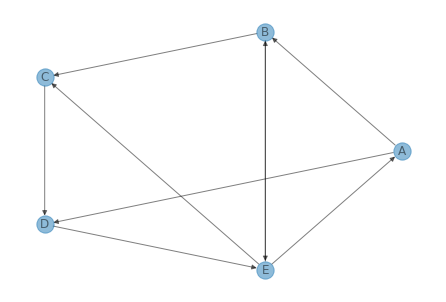

In [0]:
# part a - simple visualization of our toy graph using nx (RUN THIS CELL AS IS)
G = nx.DiGraph()
G.add_nodes_from(TOY_GRAPH['nodes'])
G.add_edges_from(TOY_GRAPH['edges'])
display(nx.draw(G, pos=nx.circular_layout(G), with_labels=True, alpha = 0.5))

In [0]:
# part c - adjacency matrix function
def get_adj_matr(graph):
    """
    Function to create an adjacency matrix representation of a graph.
    arg:
        graph - (dict) of 'nodes' : [], 'edges' : []
    returns:
        pd.DataFrame with entry i,j representing an edge from node i to node j
    """
    n = len(graph['nodes'])
    adj_matr = pd.DataFrame(0, columns = graph['nodes'], index = graph['nodes'])
    ############### YOUR CODE HERE ##################
    
    for i,j in graph['edges']:
        adj_matr.loc[i,j] = 1
        
    ############### (END) YOUR CODE #################
    return adj_matr

In [0]:
# part c - take a look (RUN THIS CELL AS IS)
TOY_ADJ_MATR = get_adj_matr(TOY_GRAPH)
print(TOY_ADJ_MATR)

A B C D E
A 0 1 0 1 0
B 0 0 1 0 1
C 0 0 0 1 0
D 0 0 0 0 1
E 1 1 1 0 0

In [0]:
# part d - adjacency list function
def get_adj_list(graph):
    """
    Function to create an adjacency list representation of a graph.
    arg:
        graph - (dict) of 'nodes' : [], 'edges' : []
    returns:
        dictionary of the form {node : [list of edges]}
    """
    adj_list = {node: [] for node in graph['nodes']}
    ############### YOUR CODE HERE ##################
    
    for i,j in graph['edges']:
        adj_list[i].append(j)
    
    ############### (END) YOUR CODE #################
    return adj_list

In [0]:
# part d - take a look (RUN THIS CELL AS IS)
TOY_ADJ_LIST = get_adj_list(TOY_GRAPH)
print(TOY_ADJ_LIST)

{'A': ['B', 'D'], 'B': ['C', 'E'], 'C': ['D'], 'D': ['E'], 'E': ['A', 'B', 'C']}

# Question 3: Markov Chains and Random Walks

As you know from your readings and in class discussions, the PageRank algorithm takes advantage of the machinery of Markov Chains to compute the relative importance of a webpage using the hyperlink structure of the web (we'll refer to this as the 'web-graph'). A Markov Chain is a discrete-time stochastic process. The stochastic matrix has a principal left eigen vector corresponding to its largest eigen value which is one. A Markov chain's probability distribution over its states may be viewed as a probability vector. This steady state probability for a state is the PageRank of the corresponding webpage. In this question we'll briefly discuss a few concepts that are key to understanding the math behind PageRank. 

### Q3 Tasks:

* __a) short response:__ It is common to explain PageRank using the analogy of a web surfer who clicks on links at random ad infinitum. In the context of this hypothetical infinite random walk, what does the PageRank metric measure/represent?

* __b) short response:__ What is the "Markov Property" and what does it mean in the context of PageRank?

* __c) short response:__ A Markov chain consists of $n$ states plus an $n\times n$ transition probability matrix. In the context of PageRank & a random walk over the WebGraph what are the $n$ states? what implications does this have about the size of the transition matrix?

* __d) code + short response:__ What is a "right stochastic matrix"? Fill in the code below to compute the transition matrix for the toy graph from question 2. [__`HINT:`__ _It should be right stochastic. Using numpy this calculation can be done in one line of code._]

* __e) code + short response:__ To compute the stable state distribution (i.e. PageRank) of a "nice" graph we can apply the power iteration method - repeatedly multiplying the transition matrix by itself, until the values no longer change. Apply this strategy to your transition matrix from `part d` to find the PageRank for each of the pages in your toy graph. Your code should print the results of each iteration. How many iterations does it take to converge? Which node is most 'central' (i.e. highest ranked)? Does this match your intuition? 
    * __`NOTE 1:`__ _this is a naive approach, we'll unpack what it means to be "nice" in the next question_.
    * __`NOTE 2:`__ _no need to implement a stopping criteria, visual inspection should suffice_.

### Q3 Student Answers:
> __a)__ The PageRank metric ranks the relative importance of each page within the WebGraph. The relative importance is measured by how frequently a page would be encountered.

> __b)__ The Markov Property is the when the next state does not depend on a sequence of events but only on the current state (memoryless). In the context of PageRank, only the current web page can determine where the user clicks next or teleports if there's no options.

> __c)__ The n states are the number of web pages (nodes). This implies the size of the transition matrix is the number of web pages times the number of web pages. Which is huge considering the size of the web.

> __d)__ A right stochastic matrix is a real square matrix, with each row summing to 1.

> __e)__ It takes 50 iterations to converge. The most central node is E. This matches my intuition because it has the most edges.

In [0]:
# part d - recall what the adjacency matrix looked like (RUN THIS CELL AS IS)
TOY_ADJ_MATR

Out[13]:

,A,B,C,D,E
A,0,1,0,1,0
B,0,0,1,0,1
C,0,0,0,1,0
D,0,0,0,0,1
E,1,1,1,0,0


In [0]:
# part d - use TOY_ADJ_MATR to create a right stochastic transition matrix for this graph
################ YOUR CODE HERE #################
transition_matrix = np.apply_along_axis(lambda x: x/np.sum(x) if np.sum(x) > 0 else x, 1, TOY_ADJ_MATR)
################ (END) YOUR CODE #################
print(transition_matrix)

[[0. 0.5 0. 0.5 0. ]
 [0. 0. 0.5 0. 0.5 ]
 [0. 0. 0. 1. 0. ]
 [0. 0. 0. 0. 1. ]
 [0.33333333 0.33333333 0.33333333 0. 0. ]]

In [0]:
# part e - compute the steady state using the transition matrix 
def power_iteration(xInit, tMatrix, nIter, verbose = True):
    """
    Function to perform the specified number of power iteration steps to 
    compute the steady state probability distribution for the given
    transition matrix.
    
    Args:
        xInit     - (n x 1 array) representing inial state
        tMatrix  - (n x n array) transition probabilities
        nIter     - (int) number of iterations
    Returns:
        state_vector - (n x 1 array) representing probability 
                        distribution over states after nSteps.
    
    NOTE: if the 'verbose' flag is on, your function should print the step
    number and the current matrix at each iteration.
    """
    state_vector = None
    ################ YOUR CODE HERE #################
    state_vector = xInit
    for ix in range(nIter):    
        
        new_state_vector = state_vector@tMatrix
        state_vector = new_state_vector
        
        if verbose:
            print(f'Step {ix}: {state_vector}')
    ################ (END) YOUR CODE #################
    return state_vector
  
  #Source: WEEK 10 DEMO

In [0]:
# part e - run 10 steps of the power_iteration (RUN THIS CELL AS IS)
xInit = np.array([1.0, 0, 0, 0, 0]) # note that this initial state will not affect the convergence states
states = power_iteration(xInit, transition_matrix, 60, verbose = True)

Step 0: [0. 0.5 0. 0.5 0. ]
Step 1: [0. 0. 0.25 0. 0.75]
Step 2: [0.25 0.25 0.25 0.25 0. ]
Step 3: [0. 0.125 0.125 0.375 0.375]
Step 4: [0.125 0.125 0.1875 0.125 0.4375]
Step 5: [0.14583333 0.20833333 0.20833333 0.25 0.1875 ]
Step 6: [0.0625 0.13541667 0.16666667 0.28125 0.35416667]
Step 7: [0.11805556 0.14930556 0.18576389 0.19791667 0.34895833]
Step 8: [0.11631944 0.17534722 0.19097222 0.24479167 0.27256944]
Step 9: [0.09085648 0.1490162 0.17853009 0.24913194 0.33246528]
Step 10: [0.11082176 0.15625 0.18532986 0.22395833 0.32364005]
Step 11: [0.10788002 0.1632909 0.18600502 0.24074074 0.30208333]
Step 12: [0.10069444 0.15463445 0.18233989 0.23994502 0.32238619]
Step 13: [0.10746206 0.15780928 0.18477929 0.23268711 0.31726225]
Step 14: [0.10575408 0.15948511 0.18465873 0.23851032 0.31159176]
Step 15: [0.10386392 0.15674096 0.18360648 0.23753577 0.31825288]
Step 16: [0.10608429 0.15801625 0.18445477 0.23553844 0.31590625]
Step 17: [0.10530208 0.15834423 0.18431021 0.23749692 0.31454656]
Step 18: [0.10484885 0.1574999 0.18402097 0.23696125 0.31666903]
Step 19: [0.10555634 0.15798077 0.18430629 0.2364454 0.3157112 ]
Step 20: [0.10523707 0.15801524 0.18422745 0.23708446 0.31543578]
Step 21: [0.10514526 0.15776379 0.18415288 0.23684598 0.31609208]
Step 22: [0.10536403 0.15793666 0.18424592 0.23672551 0.31572788]
Step 23: [0.10524263 0.15792464 0.18421096 0.23692794 0.31569384]
Step 24: [0.10523128 0.15785259 0.1841936 0.23683227 0.31589026]
Step 25: [0.10529675 0.15791239 0.18422305 0.23680924 0.31575857]
Step 26: [0.10525286 0.15790123 0.18420905 0.23687143 0.31576544]
Step 27: [0.10525515 0.15788157 0.18420576 0.23683548 0.31582204]
Step 28: [0.10527401 0.15790159 0.1842148 0.23683333 0.31577627]
Step 29: [0.10525876 0.15789576 0.18420955 0.23685181 0.31578413]
Step 30: [0.10526138 0.15789075 0.18420926 0.23683893 0.31579969]
Step 31: [0.10526656 0.15789725 0.18421194 0.23683994 0.3157843 ]
Step 32: [0.10526143 0.15789472 0.18421006 0.23684522 0.31578857]
Step 33: [0.10526286 0.15789357 0.18421021 0.23684078 0.31579258]
Step 34: [0.10526419 0.15789562 0.18421098 0.23684164 0.31578756]
Step 35: [0.10526252 0.15789462 0.18421033 0.23684308 0.31578945]
Step 36: [0.10526315 0.15789441 0.18421046 0.23684159 0.31579038]
Step 37: [0.10526346 0.15789504 0.18421067 0.23684204 0.3157888 ]
Step 38: [0.10526293 0.15789466 0.18421045 0.2368424 0.31578955]
Step 39: [0.10526318 0.15789465 0.18421052 0.23684192 0.31578973]
Step 40: [0.10526324 0.15789484 0.18421057 0.23684211 0.31578924]
Step 41: [0.10526308 0.1578947 0.1842105 0.23684219 0.31578953]
Step 42: [0.10526318 0.15789472 0.18421053 0.23684204 0.31578954]
Step 43: [0.10526318 0.15789477 0.18421054 0.23684211 0.3157894 ]
Step 44: [0.10526313 0.15789472 0.18421052 0.23684213 0.3157895 ]
Step 45: [0.10526317 0.15789473 0.18421053 0.23684208 0.31578949]
Step 46: [0.10526316 0.15789475 0.18421053 0.23684211 0.31578945]
Step 47: [0.10526315 0.15789473 0.18421052 0.23684211 0.31578948]
Step 48: [0.10526316 0.15789474 0.18421053 0.2368421 0.31578948]
Step 49: [0.10526316 0.15789474 0.18421053 0.23684211 0.31578947]
Step 50: [0.10526316 0.15789473 0.18421053 0.23684211 0.31578948]
Step 51: [0.10526316 0.15789474 0.18421053 0.2368421 0.31578947]
Step 52: [0.10526316 0.15789474 0.18421053 0.23684211 0.31578947]
Step 53: [0.10526316 0.15789474 0.18421053 0.23684211 0.31578948]
Step 54: [0.10526316 0.15789474 0.18421053 0.2368421 0.31578947]
Step 55: [0.10526316 0.15789474 0.18421053 0.23684211 0.31578947]
Step 56: [0.10526316 0.15789474 0.18421053 0.23684211 0.31578947]
Step 57: [0.10526316 0.15789474 0.18421053 0.23684211 0.31578947]
Step 58: [0.10526316 0.15789474 0.18421053 0.23684211 0.31578947]
Step 59: [0.10526316 0.15789474 0.18421053 0.23684211 0.31578947]

__`Expected Output for part e:`__  
>Steady State Probabilities:
```
Node A: 0.10526316  
Node B: 0.15789474  
Node C: 0.18421053  
Node D: 0.23684211  
Node E: 0.31578947  
```

# Question 4: Page Rank Theory

Seems easy right? Unfortunately applying this power iteration method directly to the web-graph actually runs into a few problems. In this question we'll tease apart what we meant by a 'nice graph' in Question 3 and highlight key modifications we'll have to make to the web-graph when performing PageRank. To start, we'll look at what goes wrong when we try to repeat our strategy from question 3 on a 'not nice' graph.

__`Additional References:`__ http://pi.math.cornell.edu/~mec/Winter2009/RalucaRemus/Lecture3/lecture3.html

### Q4 Tasks:

* __a) code + short response:__ Run the provided code to create and plot our 'not nice' graph. Fill in the missing code to compute its transition matrix & run the power iteration method from question 3. What is wrong with what you see? [__`HINT:`__ _there is a visible underlying reason that it isn't converging... try adding up the probabilities in the state vector after each iteration._]

* __b) short response:__  Identify the dangling node in this 'not nice' graph and explain how this node causes the problem you described in 'a'. How could we modify the transition matrix after each iteration to prevent this problem?

* __c) short response:__ What does it mean for a graph to be irreducible? Is the webgraph naturally irreducible? Explain your reasoning briefly.

* __d) short response:__ What does it mean for a graph to be aperiodic? Is the webgraph naturally aperiodic? Explain your reasoning briefly.

* __e) short response:__ What modification to the webgraph does PageRank make in order to guarantee aperiodicity and irreducibility? Interpret this modification in terms of our random surfer analogy.

### Q4 Student Answers:
> __a)__ We're losing probability mass with each iteration.

> __b)__ The dangling node is 'D'. We could modify the transition matrix by redistributing the lost mass evenly to all nodes. 

> __c)__ In an irreducible graph you can go from any state to other states. A Markov chain is said to be irreducible if its state space is a single communicating class. A webgraph is not naturally irreducible. There could be pages that have yet to be crawled resulting in dangling nodes. There could also be naturally occuring dangling nodes like downloads, images, movies etc.

> __d)__ In an aperiodic graph, the greatest common divisor of all cycle lengths is 1. A webgraph is not naturally aperiodic. Similar to what was mentioned above, because there could be pages that have yet to be crawled, this could result in periodicity. 

> __e)__ The modifications to help guarantee aperiodicity and irreducibiliity is to implement teleportation and adding self loops. This would allow the random surfer to "teleport" out of dangling nodes in the form of entering a new URL and self loops.

In [0]:
# part a - run this code to create a second toy graph (RUN THIS CELL AS IS)
TOY2_GRAPH = {'nodes':['A', 'B', 'C', 'D', 'E'],
              'edges':[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'D'), 
                       ('B', 'E'), ('C', 'A'), ('C', 'E'), ('D', 'B')]}

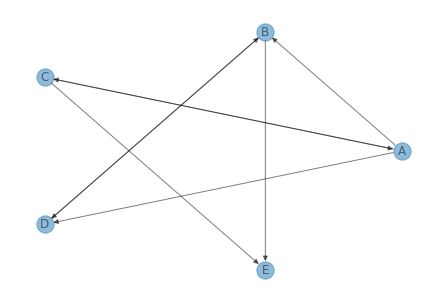

In [0]:
# part a - simple visualization of our test graph using nx (RUN THIS CELL AS IS)
G = nx.DiGraph()
G.add_nodes_from(TOY2_GRAPH['nodes'])
G.add_edges_from(TOY2_GRAPH['edges'])
display(nx.draw(G, pos=nx.circular_layout(G), with_labels=True, alpha = 0.5))

In [0]:
# part a - run 10 steps of the power iteration method here
# HINT: feel free to use the functions get_adj_matr() and power_iteration() you wrote above
################ YOUR CODE HERE #################

TOY2_ADJ_MATR = get_adj_matr(TOY2_GRAPH)
transition_matrix = np.apply_along_axis(lambda x: x/np.sum(x) if np.sum(x) > 0 else x, 1, TOY2_ADJ_MATR)
xInit = np.array([1.0, 0, 0, 0, 0])
states = power_iteration(xInit, transition_matrix, 10, verbose = True)

################ (END) YOUR CODE #################

Step 0: [0. 0.33333333 0.33333333 0.33333333 0. ]
Step 1: [0.16666667 0.33333333 0. 0.16666667 0.33333333]
Step 2: [0. 0.22222222 0.05555556 0.22222222 0.16666667]
Step 3: [0.02777778 0.22222222 0. 0.11111111 0.13888889]
Step 4: [0. 0.12037037 0.00925926 0.12037037 0.11111111]
Step 5: [0.00462963 0.12037037 0. 0.06018519 0.06481481]
Step 6: [0. 0.0617284 0.00154321 0.0617284 0.06018519]
Step 7: [0.0007716 0.0617284 0. 0.0308642 0.0316358]
Step 8: [0. 0.0311214 0.0002572 0.0311214 0.0308642]
Step 9: [0.0001286 0.0311214 0. 0.0155607 0.0156893]

# About the Data
The main dataset for this data consists of a subset of a 500GB dataset released by AWS in 2009. The data includes the source and metadata for all of the Wikimedia wikis. You can read more here: 
> https://aws.amazon.com/blogs/aws/new-public-data-set-wikipedia-xml-data. 

As in previous homeworks we'll be using a 2GB subset of this data, which is available to you in this dropbox folder: 
> https://www.dropbox.com/sh/2c0k5adwz36lkcw/AAAAKsjQfF9uHfv-X9mCqr9wa?dl=0. 

Use the cells below to download the wikipedia data and a test file for use in developing your PageRank implementation(note that we'll use the 'indexed out' version of the graph) and to take a look at the files.

In [0]:
dbutils.fs.ls(DATA_PATH)

Out[20]: [FileInfo(path='dbfs:/mnt/mids-w261/HW5/all-pages-indexed-in.txt', name='all-pages-indexed-in.txt', size=2143300687),
 FileInfo(path='dbfs:/mnt/mids-w261/HW5/all-pages-indexed-out.txt', name='all-pages-indexed-out.txt', size=2090459616),
 FileInfo(path='dbfs:/mnt/mids-w261/HW5/indices.txt', name='indices.txt', size=517438296),
 FileInfo(path='dbfs:/mnt/mids-w261/HW5/test_graph.txt', name='test_graph.txt', size=167)]

In [0]:
# open test_graph.txt file to see format (RUN THIS CELL AS IS)
with open('/dbfs/mnt/mids-w261/HW5/test_graph.txt', "r") as f_read:
  for line in f_read:
    print(line)

2	{'3': 1}

3	{'2': 2}

4	{'1': 1, '2': 1}

5	{'4': 3, '2': 1, '6': 1}

6	{'2': 1, '5': 2}

7	{'2': 1, '5': 1}

8	{'2': 1, '5': 1}

9	{'2': 1, '5': 1}

10	{'5': 1}

11	{'5': 2}

In [0]:
# load the data into Spark RDDs for convenience of use later (RUN THIS CELL AS IS)
DATA_PATH = 'dbfs:/mnt/mids-w261/HW5/'
testRDD = sc.textFile(DATA_PATH +'test_graph.txt')
indexRDD = sc.textFile(DATA_PATH + '/indices.txt')
wikiRDD = sc.textFile(DATA_PATH + '/all-pages-indexed-out.txt')

In [0]:
# display testRDD (RUN THIS CELL AS IS)
testRDD.take(10)

Out[23]: ["2\t{'3': 1}",
 "3\t{'2': 2}",
 "4\t{'1': 1, '2': 1}",
 "5\t{'4': 3, '2': 1, '6': 1}",
 "6\t{'2': 1, '5': 2}",
 "7\t{'2': 1, '5': 1}",
 "8\t{'2': 1, '5': 1}",
 "9\t{'2': 1, '5': 1}",
 "10\t{'5': 1}",
 "11\t{'5': 2}"]

In [0]:
# display indexRDD (RUN THIS CELL AS IS)
indexRDD.take(10)

Out[24]: ['! $var = &quot;&quot;\t1\t1\t0',
 '! (CONFIG.SYS directive)\t2\t1\t1',
 '! (album)\t3\t12\t17',
 '! (disambiguation)\t4\t1\t20',
 '! -attention-\t5\t1\t0',
 '! Time Zone\t6\t1\t0',
 '!! (chess)\t7\t0\t1',
 '!! (disambiguation)\t8\t3\t0',
 '!!! (Chk Chk Chk)\t9\t1\t0',
 '!!! (album)\t10\t5\t15']

In [0]:
# display wikiRDD (RUN THIS CELL AS IS)
wikiRDD.take(10)

Out[25]: ["73\t{'14417532': 1}",
 "299\t{'4214575': 1}",
 "2552\t{'15043376': 1, '13430968': 1, '13451035': 1, '7263397': 1, '13001625': 1, '13443575': 1, '13451269': 1, '13432316': 1, '11623371': 1, '15028971': 1, '13425865': 1, '15042703': 1, '5051368': 1, '9854998': 2, '13442976': 1, '13315025': 1, '2992307': 1, '1054486': 1, '1322325': 1, '13450983': 1}",
 "2570\t{'983991': 1}",
 "2616\t{'9045350': 1}",
 "2711\t{'752887': 1}",
 "2818\t{'3534183': 1}",
 "2847\t{'3797918': 1}",
 "2892\t{'2893': 1}",
 "2921\t{'5158607': 1, '6007184': 1, '14773825': 1, '11777840': 2, '9285165': 1, '6420484': 1, '14670682': 1, '7316613': 1, '7125893': 1, '14965920': 1, '14229952': 1, '9447742': 2, '1425342': 1, '11390944': 2, '5141': 1, '14928135': 2, '13636570': 3, '14687433': 1, '15105458': 1, '11656072': 1, '6420027': 1, '10898196': 1, '6416278': 1, '11497740': 2}"]

# Question 5: EDA part 1 (number of nodes)

As usual, before we dive in to the main analysis, we'll peform some exploratory data anlysis to understand our dataset. Please use the test graph that you downloaded to test all your code before running the full dataset.

### Q5 Tasks:
* __a) short response:__ In what format is the raw data? What does the first value represent? What does the second part of each line represent? [__`HINT:`__ _no need to go digging here, just visually inspect the outputs of the head commands that we ran after loading the data above._]

* __b) code + short response:__ Run the provided bash command to count the number of records in the raw dataset. Explain why this is _not_ the same as the number of total nodes in the graph.

* __c) code:__ In the space provided below write a Spark job to count the _total number_ of nodes in this graph. 

* __d) short response:__ How many dangling nodes are there in this wikipedia graph? [__`HINT:`__ _you should not need any code to answer this question._]

### Q5 Student Answers:
> __a)__ The file format of the raw data is an XML document that contains values for "source" and "metadata" in the form of wikitext in the form of an adjacency list. For the wikiRDD (all pages indexed out), the first value represents the page's SourceID (unique index for the wikipage), aka **nodes**, while the second part includes the sourceID of pages linked in the current page and also their occurance of that link on that page. For the indexRDD, this is what links the SourceID for each wiki page to the title of the page (or the search identifier).

> __b)__ This is not the number of total nodes in the graph because this dataset is an example of an adjacency list with out nodes appearing on different records (with many repeating nodes). The dataset needs to be reduced to count the unique number of *keys* to determine the total number of nodes.

> __d)__ Database count - reduced total node count =  

$$ (15,192,277 \text{   Records}) - (5,781,290 \text{    Total Nodes}) = 9,410,987 \text{   Dangling Nodes} $$

In [0]:
# part b - count the number of records in the raw data (RUN THIS CELL AS IS)
# 5781290
print(wikiRDD.count())

5781290

In [0]:
# part c - write your Spark job here (compute total number of nodes)
def count_nodes(dataRDD):
    """
    Spark job to count the total number of nodes.
    Returns: integer count 
    """    
    ############## YOUR CODE HERE ###############
    def getEdgeNodes(line):
        node, edges = line.split('\t')
        edgeNodes = ast.literal_eval(edges)
        for node in edgeNodes:
          yield int(node)
    
    nodesRDD = dataRDD.map(lambda x: int(x.split('\t')[0]))
    edgeNodesRDD = dataRDD.flatMap(getEdgeNodes).distinct()
    totalCount = nodesRDD.union(edgeNodesRDD).distinct().count()
    
    ############# (END) YOUR CODE ###############   
    return totalCount

In [0]:
# part c - run your counting job on the test file (RUN THIS CELL AS IS)
start = time.time()
tot = count_nodes(testRDD)
print(f'... completed job in {time.time() - start} seconds.')
print(f'Total Nodes: {tot}')

... completed job in 1.085556983947754 seconds.
Total Nodes: 11

In [0]:
# part c - run your counting job on the full file (RUN THIS CELL AS IS)
start = time.time()
tot = count_nodes(wikiRDD)
print(f'... completed job in {time.time() - start} seconds.')
print(f'Total Nodes: {tot}')

... completed job in 385.6003634929657 seconds.
Total Nodes: 15192277

# Question 6 - EDA part 2 (out-degree distribution)

As you've seen in previous homeworks the computational complexity of an implementation depends not only on the number of records in the original dataset but also on the number of records we create and shuffle in our intermediate representation of the data. The number of intermediate records required to update PageRank is related to the number of edges in the graph. In this question you'll compute the average number of hyperlinks on each page in this data and visualize a distribution for these counts (the out-degree of the nodes). 

### Q6 Tasks:
* __a) code:__ In the space provided below write a Spark job to stream over the data and compute all of the following information:
 * count the out-degree of each non-dangling node and return the names of the top 10 pages with the most hyperlinks
 * find the average out-degree for all non-dangling nodes in the graph
 * take a 1000 point sample of these out-degree counts and plot a histogram of the result. 
 
 
* __b) short response:__ In the context of the PageRank algorithm, how is information about a node's out degree used?

* __c) short response:__ What does it mean if a node's out-degree is 0? In PageRank how will we handle these nodes differently than others?
 
__`NOTE:`__ Please observe scalability best practices in the design of your code & comment your work clearly. You will be graded on both the clarity and the design.

### Q6 Student Answers:

> __b)__ Within the PageRank algorithm, the information about nodes' out degree is directly related to the rank of a page (how many outnodes are pointing to a particular node increases the page rank).

> __c)__ When a node has an out-degree of 0 (it does not point to anything), it is identified as a dangling node. Dangling nodes result in loss of mass when not handled properly (all the pagerank values end up going to this page as a ranking sink). In order to handle these dangling nodes properly, we should redistribute the mass across all nodes in the graph evenly and implement a way to escape the dangling nodes (teleportation).

In [0]:
# part a - write your Spark job here (compute average in-degree, etc)
def count_degree(dataRDD, n):
    """
    Function to analyze out-degree of nodes in a a graph.
    Returns: 
        top  - (list of 10 tuples) nodes with most edges
        avgDegree - (float) average out-degree for non-dangling nodes
        sampledCounts - (list of integers) out-degree for n randomly sampled non-dangling nodes
    """
    # helper func
    def parse(line):
        node, edges = line.split('\t')
        return (node, ast.literal_eval(edges))
    
    ############## YOUR CODE HERE ###############
    def getEdges(line):
        node, edgeNodes = line
        for outlink in edgeNodes:
          yield (node, outlink)
          
    nodeRDD = dataRDD.map(parse) \
                      .flatMap(getEdges).flatMap(lambda x: (int(x[0]), int(x[1]))) \
                      .map(lambda x: (str(x), 1)) \
                      .reduceByKey(lambda x,y: x + y)
    
    top = nodeRDD.takeOrdered(int(n), key=lambda x: -x[1])
    avgDegree = nodeRDD.map(lambda x: x[1]).mean()
    sampledCounts = nodeRDD.map(lambda x: x[1]).takeSample(False, n)
    
    ############## (END) YOUR CODE ###############
    return top, avgDegree, sampledCounts

In [0]:
# part a - run your job on the test file (RUN THIS CELL AS IS)
start = time.time()
test_results = count_degree(testRDD,10)
print(f"... completed job in {time.time() - start} seconds")
print("Average out-degree: ", test_results[1])
print("Top 10 nodes (by out-degree:)\n", test_results[0])

... completed job in 0.36821889877319336 seconds
Average out-degree: 3.090909090909091
Top 10 nodes (by out-degree:)
 [('5', 9), ('2', 8), ('4', 3), ('6', 3), ('8', 2), ('9', 2), ('3', 2), ('7', 2), ('1', 1), ('10', 1)]

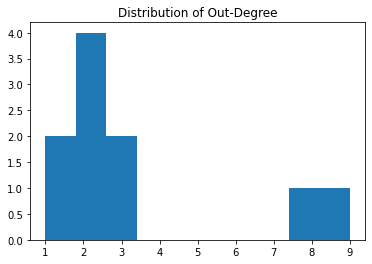

In [0]:
# part a - plot results from test file (RUN THIS CELL AS IS)
plt.hist(test_results[2], bins=10)
plt.title("Distribution of Out-Degree")
display(plt.show())

In [0]:
# part a - run your job on the full file (RUN THIS CELL AS IS)
start = time.time()
full_results = count_degree(wikiRDD,1000)

print(f"... completed job in {time.time() - start} seconds")
print("Average out-degree: ", full_results[1])
print("Top 10 nodes (by out-degree:)\n", full_results[0])

... completed job in 778.2836182117462 seconds
Average out-degree: 18.708723781167365
Top 10 nodes (by out-degree:)
 [('13455888', 398642), ('1184351', 182532), ('4695850', 142327), ('1384888', 128350), ('5051368', 126228), ('4196067', 125439), ('2437837', 124858), ('6113490', 121664), ('6076759', 116950), ('14112583', 116022), ('7835160', 114625), ('13425865', 110367), ('1516699', 93766), ('7990491', 90181), ('6237129', 89597), ('6416278', 87935), ('7576704', 86808), ('6172466', 86591), ('9386580', 79282), ('10390714', 73529), ('2396749', 73182), ('15164193', 71917), ('14881689', 68282), ('11253108', 68146), ('3191491', 67969), ('994890', 67809), ('12074312', 65840), ('4198751', 65422), ('9391762', 64533), ('3191268', 63084), ('10566120', 62795), ('1637982', 62383), ('11245362', 61789), ('1441065', 61410), ('9276255', 60577), ('6172167', 60298), ('6171937', 60176), ('12836211', 57753), ('2155467', 56931), ('2797855', 56794), ('13725487', 55789), ('4978429', 55599), ('14503460', 55570), ('10469541', 55523), ('5154210', 55368), ('11148415', 55299), ('14112408', 54504), ('12430985', 50917), ('9355455', 50686), ('10399499', 50655), ('8697871', 50361), ('9997298', 48271), ('14565507', 47341), ('11582765', 46535), ('13432150', 45333), ('1175360', 43821), ('4344962', 43765), ('15070394', 42718), ('8019937', 41730), ('14963657', 41553), ('9394907', 41036), ('12447593', 40916), ('12067030', 40640), ('14727077', 40423), ('9562547', 40364), ('3603527', 39434), ('13280859', 39279), ('4502743', 39221), ('1575979', 39018), ('3069099', 38478), ('12038331', 38432), ('12685893', 38016), ('2614581', 36830), ('14281833', 36787), ('11147327', 36184), ('14941437', 35758), ('1062600', 35245), ('8446758', 35209), ('14967969', 35095), ('1523975', 35062), ('10246542', 34854), ('1947095', 34847), ('12785678', 34800), ('1332806', 34553), ('14691339', 34400), ('9742161', 34131), ('3577363', 34123), ('9390959', 34015), ('4320007', 33504), ('1813634', 33467), ('10917716', 33296), ('7902219', 33189), ('2614578', 33111), ('1184441', 32956), ('10131397', 32906), ('13433669', 32710), ('13853369', 32364), ('13944830', 32342), ('2778099', 32048), ('2826542', 31170), ('4622124', 31095), ('13348221', 30641), ('10345922', 30441), ('5274313', 30178), ('13328060', 30159), ('8641167', 30062), ('9924814', 29901), ('3591832', 29588), ('6176135', 29479), ('5756977', 29183), ('6222591', 29144), ('7467330', 29038), ('1053553', 28749), ('4568647', 28332), ('14723576', 28163), ('11150209', 28094), ('1864361', 28000), ('12048800', 27341), ('8765370', 27195), ('6041511', 26873), ('10728264', 26869), ('5908108', 26618), ('10447338', 26512), ('14743666', 26501), ('13135057', 26169), ('8941660', 26075), ('14878055', 26009), ('9284805', 25974), ('6089405', 25907), ('9534683', 25685), ('11102316', 25563), ('343926', 25409), ('13383446', 25404), ('10425498', 25381), ('8258220', 25375), ('11142409', 25308), ('755452', 24885), ('9010668', 24646), ('12453082', 24539), ('1797655', 24529), ('9376362', 24493), ('13443575', 24336), ('12222311', 24300), ('13802598', 24295), ('1424525', 24156), ('9667475', 24142), ('8019717', 23937), ('4933717', 23801), ('14709489', 23775), ('14774430', 23653), ('4783981', 23625), ('10232589', 23458), ('14517385', 23335), ('9262529', 23304), ('6080621', 23297), ('13691678', 23056), ('10665856', 23052), ('4056814', 23032), ('12692541', 22781), ('3554091', 22618), ('8502227', 22596), ('1947204', 22589), ('884277', 22490), ('10345830', 22484), ('2198277', 22420), ('10169773', 22382), ('3328327', 22369), ('10454731', 22351), ('9382973', 22246), ('3036297', 22232), ('8273081', 22106), ('12077147', 22070), ('8630387', 22068), ('1440095', 21943), ('11623371', 21916), ('5820606', 21898), ('14523062', 21450), ('11449900', 21394), ('13431812', 21385), ('14614474', 21336), ('14517508', 21315), ('13650392', 21275), ('4186918', 21208), ('11875526', 20807), ('11673081', 20780), ('5045896', 20670), ('3973000', 20627), ('7842650', 20594), ('11210464', 20424), ('13337951', 

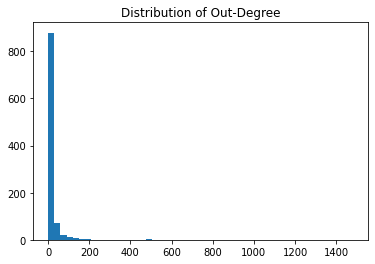

In [0]:
# part a - plot results from full file (RUN THIS CELL AS IS)
plt.hist(full_results[2], bins=50)
plt.title("Distribution of Out-Degree")
display(plt.show())

# Question 7 - PageRank part 1 (Initialize the Graph)

One of the challenges of performing distributed graph computation is that you must pass the entire graph structure through each iteration of your algorithm. As usual, we seek to design our computation so that as much work as possible can be done using the contents of a single record. In the case of PageRank, we'll need each record to include a node, its list of neighbors and its (current) rank. In this question you'll initialize the graph by creating a record for each dangling node and by setting the initial rank to 1/N for all nodes. 

__`NOTE:`__ Your solution should _not_ hard code \\(N\\).

### Q7 Tasks:
* __a) short response:__ What is \\(N\\)? Use the analogy of the infinite random web-surfer to explain why we'll initialize each node's rank to \\(\frac{1}{N}\\). (i.e. what is the probabilistic interpretation of this choice?)

* __b) short response:__ Will it be more efficient to compute \\(N\\) before initializing records for each dangling node or after? Explain your reasoning.

* __c) code:__ Fill in the missing code below to create a Spark job that:
  * parses each input record
  * creates a new record for any dangling nodes and sets it list of neighbors to be an empty set
  * initializes a rank of 1/N for each node
  * returns a pair RDD with records in the format specified by the docstring


* __d) code:__ Run the provided code to confirm that your job in `part a` has a record for each node and that your should records match the format specified in the docstring and the count should match what you computed in question 5. [__`TIP:`__ _you might want to take a moment to write out what the expected output should be fore the test graph, this will help you know your code works as expected_]
 
__`NOTE:`__ Please observe scalability best practices in the design of your code & comment your work clearly. You will be graded on both the clarity and the design.

### Q7 Student Answers:

> __a)__ N is the total nodes. We will initialize each node's rank to 1/N due to probablility of an infinite random web-surfer visiting any node is equal.

> __b)__ Computing N before initializing records for each dangling node will be more efficient. The reason computing N before is more efficient is because the value only be calculated on the whole dataset then be distributed.

In [0]:
# part c - job to initialize the graph (RUN THIS CELL AS IS)
def initGraph(dataRDD):
    """
    Spark job to read in the raw data and initialize an 
    adjacency list representation with a record for each
    node (including dangling nodes).
    
    Returns: 
        graphRDD -  a pair RDD of (node_id , (score, edges))
        
    NOTE: The score should be a float, but you may want to be 
    strategic about how format the edges... there are a few 
    options that can work. Make sure that whatever you choose
    is sufficient for Question 8 where you'll run PageRank.
    """
    ############## YOUR CODE HERE ###############

    # write any helper functions here
    def parseNeighbors(line):
      node,edges = line.strip().split('\t')
      edges = ast.literal_eval(edges)
      for edge in edges:  
        yield (edge, [])
      yield (node, list(edges.items()))
    # write your main Spark code here
    links = dataRDD.flatMap(parseNeighbors) \
                   .reduceByKey(lambda a,b :list(set(a+b))) \
                   .cache()
    N = sc.broadcast(links.count())
    ranks = links.map(lambda x : (x[0],1.0/N.value))
    graphRDD = ranks.join(links) \
                    .cache()
    ############## (END) YOUR CODE ##############
    
    return graphRDD

In [0]:
# part c - run your Spark job on the test graph (RUN THIS CELL AS IS)
start = time.time()
testGraph = initGraph(testRDD).collect()
print(f'... test graph initialized in {time.time() - start} seconds.')
testGraph

... test graph initialized in 10.42961072921753 seconds.
Out[243]: [('4', (0.09090909090909091, [('2', 1), ('1', 1)])),
 ('10', (0.09090909090909091, [('5', 1)])),
 ('3', (0.09090909090909091, [('2', 2)])),
 ('6', (0.09090909090909091, [('5', 2), ('2', 1)])),
 ('7', (0.09090909090909091, [('2', 1), ('5', 1)])),
 ('1', (0.09090909090909091, [])),
 ('8', (0.09090909090909091, [('2', 1), ('5', 1)])),
 ('9', (0.09090909090909091, [('2', 1), ('5', 1)])),
 ('2', (0.09090909090909091, [('3', 1)])),
 ('5', (0.09090909090909091, [('2', 1), ('4', 3), ('6', 1)])),
 ('11', (0.09090909090909091, [('5', 2)]))]

In [0]:
# part c - run your code on the main graph (RUN THIS CELL AS IS)
start = time.time()
wikiGraphRDD = initGraph(wikiRDD)
print(f'... full graph initialized in {time.time() - start} seconds')

... full graph initialized in 945.9185209274292 seconds

In [0]:
# part c - confirm record format and count (RUN THIS CELL AS IS)
start = time.time()
print(f'Total number of records: {wikiGraphRDD.count()}')
print(f'First record: {wikiGraphRDD.take(1)}')
print(f'... initialization continued: {time.time() - start} seconds')

Total number of records: 15192277
First record: [('1195135', (6.582291778908455e-08, []))]
... initialization continued: 496.82804775238037 seconds

# Question 8 - PageRank part 2 (Iterate until convergence)

Finally we're ready to compute the page rank. In this last question you'll write a Spark job that iterates over the initialized graph updating each nodes score until it reaches a convergence threshold. The diagram below gives a visual overview of the process using a 5 node toy graph. Pay particular attention to what happens to the dangling mass at each iteration.

<img src='https://github.com/kyleiwaniec/w261_assets/blob/master/images/HW5/PR-illustrated.png?raw=true' width=50%>



__`A Note about Notation:`__ The formula above describes how to compute the updated page rank for a node in the graph. The $P$ on the left hand side of the equation is the new score, and the $P$ on the right hand side of the equation represents the accumulated mass that was re-distributed from all of that node's in-links. Finally, $|G|$ is the number of nodes in the graph (which we've elsewhere refered to as $N$).

### Q8 Tasks:
* __a) short response:__ In terms of the infinite random walk analogy, interpret the meaning of the first term in the PageRank calculation: $\alpha * \frac{1}{|G|}$

* __b) short response:__ In the equation for the PageRank calculation above what does $m$ represent and why do we divide it by $|G|$?

* __c) short response:__ Keeping track of the total probability mass after each update is a good way to confirm that your algorithm is on track. How much should the total mass be after each iteration?

* __d) code:__ Fill in the missing code below to create a Spark job that take the initialized graph as its input then iterates over the graph and for each pass:
  * reads in each record and redistributes the node's current score to each of its neighbors
  * uses an accumulator to add up the dangling node mass and redistribute it among all the nodes. (_Don't forget to reset this accumulator after each iteration!_)
  * uses an accumulator to keep track of the total mass being redistributed.( _This is just for your own check, its not part of the PageRank calculation. Don't forget to reset this accumulator after each iteration._)
  * aggregates these partial scores for each node
  * applies telportation and damping factors as described in the formula above.
  * combine all of the above to compute the PageRank as described by the formula above.
  * 
  
   __WARNING:__ Some pages contain multiple hyperlinks to the same destination, please take this into account when redistributing the mass.

 
__`NOTE:`__ Please observe scalability best practices in the design of your code & comment your work clearly. You will be graded on both the clarity and the design.

### Q8 Student Answers:

> __a)__ The meaning of the first term in the PageRank calculation in terms of the infinite random walk is the probability of a random jump to another node during the random walk

> __b)__ In the PageRank calculation m represents the mass of dangling node probability and we divide it by G to distribute the mass of probibility evenly to the remaining node.

> __c)__ The toal mass after each iteration should be 1

In [0]:
# part d - provided FloatAccumulator class (RUN THIS CELL AS IS)

from pyspark.accumulators import AccumulatorParam

class FloatAccumulatorParam(AccumulatorParam):
    """
    Custom accumulator for use in page rank to keep track of various masses.
    
    IMPORTANT: accumulators should only be called inside actions to avoid duplication.
    We stringly recommend you use the 'foreach' action in your implementation below.
    """
    def zero(self, value):
        return value
    def addInPlace(self, val1, val2):
        return val1 + val2

In [0]:
# part d - job to run PageRank (RUN THIS CELL AS IS)
def runPageRank(graphInitRDD, alpha = 0.15, maxIter = 10, verbose = True):
    """
    Spark job to implement page rank
    Args: 
        graphInitRDD  - pair RDD of (node_id , (score, edges))
        alpha         - (float) teleportation factor
        maxIter       - (int) stopping criteria (number of iterations)
        verbose       - (bool) option to print logging info after each iteration
    Returns:
        steadyStateRDD - pair RDD of (node_id, pageRank)
    """
    # teleportation:
    a = sc.broadcast(alpha)
    
    # damping factor:
    d = sc.broadcast(1-a.value)
    
    # initialize accumulators for dangling mass & total mass
    mmAccum = sc.accumulator(0.0, FloatAccumulatorParam())
    totAccum = sc.accumulator(0.0, FloatAccumulatorParam())
    
    ############## YOUR CODE HERE ###############
    
    # write your helper functions here, 
    # please document the purpose of each clearly 
    # for reference, the master solution has 5 helper functions.
    def computeContribs(row):
      node,(rank,edges) = row
      sum_edges = sum(cnt for rank,cnt in edges)
      for edge,cnt_edge in edges:
        updateRank = rank*cnt_edge/sum_edges
        yield (edge, (updateRank,[]))
      yield (node,(0,edges))

    def accumContribs(row):
      node,(rank,edges) = row
      if not edges:
        mmAccum.add(rank)
      totAccum.add(rank)

    def updateContribs(row):
      node,(rank,edges) = row
      updateRank = (a.value/N.value) + (d.value * (m.value/N.value + rank))
      yield (node,(updateRank,edges))
    # write your main Spark Job here (including the for loop to iterate)
    # for reference, the master solution is 21 lines including comments & whitespace
    N = sc.broadcast(graphInitRDD.count())
    for nIter in range(maxIter):
      mmAccum = sc.accumulator(0.0, FloatAccumulatorParam())
      totAccum = sc.accumulator(0.0, FloatAccumulatorParam())
      graphInitRDD.foreach(accumContribs)
      m = sc.broadcast(mmAccum.value)
      graphInitRDD = graphInitRDD.flatMap(computeContribs) \
                                 .reduceByKey(lambda a,b : (a[0]+b[0],list(set(a[1]+b[1])))) \
                                 .flatMap(updateContribs) \
                                 .cache()      

      if verbose:
        print(f"iteration:{nIter}, total mass:{totAccum.value}")

    steadyStateRDD = graphInitRDD.map(lambda x : (x[0],x[1][0])).cache()    
    ############## (END) YOUR CODE ###############
    
    return steadyStateRDD

In [0]:
# part d - run PageRank on the test graph (RUN THIS CELL AS IS)
# NOTE: while developing your code you may want turn on the verbose option
nIter = 20
testGraphRDD = initGraph(testRDD)
start = time.time()
test_results = runPageRank(testGraphRDD, alpha = 0.15, maxIter = nIter, verbose = False)
print(f'...trained {nIter} iterations in {time.time() - start} seconds.')
print(f'Top 20 ranked nodes:')
test_results.takeOrdered(20, key=lambda x: - x[1])

...trained 20 iterations in 120.76270198822021 seconds.
Top 20 ranked nodes:
Out[248]: [('2', 0.3620640495978872),
 ('3', 0.33399270047414203),
 ('5', 0.08506399429624556),
 ('4', 0.06030963508473455),
 ('1', 0.04255740809817991),
 ('6', 0.03138662354831139),
 ('10', 0.01692511778009981),
 ('7', 0.01692511778009981),
 ('8', 0.01692511778009981),
 ('9', 0.01692511778009981),
 ('11', 0.01692511778009981)]

__`expected results for the test graph:`__
```
[(2, 0.3620640495978871),
 (3, 0.333992700474142),
 (5, 0.08506399429624555),
 (4, 0.06030963508473455),
 (1, 0.04255740809817991),
 (6, 0.03138662354831139),
 (8, 0.01692511778009981),
 (10, 0.01692511778009981),
 (7, 0.01692511778009981),
 (9, 0.01692511778009981),
 (11, 0.01692511778009981)]
```

In [0]:
# part d - run PageRank on the full graph (RUN THIS CELL AS IS)
# NOTE: wikiGraphRDD should have been computed & cached above!
nIter = 10
start = time.time()
full_results = runPageRank(wikiGraphRDD, alpha = 0.15, maxIter = nIter, verbose = True)
print(f'...trained {nIter} iterations in {time.time() - start} seconds.')
print(f'Top 20 ranked nodes:')
full_results.takeOrdered(20, key=lambda x: - x[1])

iteration:0, total mass:0.9999999999595904
iteration:1, total mass:0.9999999999947404
iteration:2, total mass:0.9999999999982823
iteration:3, total mass:0.9999999999969164
iteration:4, total mass:0.9999999999985156
iteration:5, total mass:0.9999999999998664
iteration:6, total mass:0.9999999999963044
iteration:7, total mass:1.000000000000903
iteration:8, total mass:0.9999999999986466
iteration:9, total mass:0.9999999999964433
...trained 10 iterations in 9693.787944316864 seconds.
Top 20 ranked nodes:
Out[249]: [('13455888', 0.0015447247129787868),
 ('4695850', 0.000671024071888752),
 ('5051368', 0.0005983856809730729),
 ('1184351', 0.0005982073536453235),
 ('2437837', 0.0004624928928927242),
 ('6076759', 0.00045509400641322164),
 ('4196067', 0.00044237788883598705),
 ('13425865', 0.0004415535171420944),
 ('6172466', 0.00042240020018333103),
 ('1384888', 0.00040128956040644297),
 ('6113490', 0.00039578924771714277),
 ('14112583', 0.00039438472837424114),
 ('7902219', 0.00037009878473463764),
 ('10390714', 0.0003650264964317468),
 ('12836211', 0.00036199488631023335),
 ('6237129', 0.0003519555847615017),
 ('6416278', 0.000348662356451678),
 ('13432150', 0.00033936510637314976),
 ('1516699', 0.0003329750028614783),
 ('7990491', 0.000307609062657741)]

In [0]:
top_20 = full_results.takeOrdered(20, key=lambda x: - x[1])

In [0]:
#Blob storage initialization

blob_container = "tm30container" # The name of your container created in https://portal.azure.com
storage_account = "w261tm30" # The name of your Storage account created in https://portal.azure.com
secret_scope = "w261tm30" # The name of the scope created in your local computer using the Databricks CLI
secret_key = "tm30key" # The name of the secret key created in your local computer using the Databricks CLI 
blob_url = f"wasbs://{blob_container}@{storage_account}.blob.core.windows.net"

In [0]:
# Save the top_20 results to disc for use later. So you don't have to rerun everything if you restart the cluster.

# This command will write to your Cloud Storage if right permissions are in place. 
# Navigate back to your Storage account in https://portal.azure.com, to inspect the files.
top_20.write.parquet(f"{blob_url}/hw5_q8")

--------------------------------------------------------------------------- 
 AttributeError Traceback (most recent call last)
 <command-960680182316327> in <module> 
 3 # This command will write to your Cloud Storage if right permissions are in place. 
 4 # Navigate back to your Storage account in https://portal.azure.com, to inspect the files. 
 ----> 5 top_20 . write . parquet ( f"{blob_url}/hw5_q8" ) 

 AttributeError : 'list' object has no attribute 'write'

In [0]:
# view record from indexRDD (RUN THIS CELL AS IS)
# title\t indx\t inDeg\t outDeg
indexRDD.take(1)

Out[253]: ['! $var = &quot;&quot;\t1\t1\t0']

In [0]:
# map indexRDD to new format (index, name) (RUN THIS CELL AS IS)
namesKV_RDD = indexRDD.map(lambda x: (int(x.split('\t')[1]), x.split('\t')[0]))

In [0]:
# see new format (RUN THIS CELL AS IS)
namesKV_RDD.take(2)

Out[255]: [(1, '! $var = &quot;&quot;'), (2, '! (CONFIG.SYS directive)')]

# OPTIONAL
### The rest of this notebook is optional and doesn't count toward your grade.
The indexRDD we created earlier from the indices.txt file contains the titles of the pages and thier IDs.

* __a) code:__ Join this dataset with your top 20 results.
* __b) code:__ Print the results

## Join with indexRDD and print pretty

In [0]:
# part a
joinedWithNames = None
############## YOUR CODE HERE ###############

############## END YOUR CODE ###############

In [0]:
# part b
# Feel free to modify this cell to suit your implementation, but please keep the formatting and sort order.
print("{:10s}\t| {:10s}\t| {}".format("PageRank","Page id","Title"))
print("="*100)
for r in joinedWithNames:
    print ("{:6f}\t| {:10d}\t| {}".format(r[1][1],r[0],r[1][0]))

## OPTIONAL - GraphFrames
GraphFrames is a graph library which is built on top of the Spark DataFrames API.

* __a) code:__ Using the same dataset, run the graphframes implementation of pagerank.
* __b) code:__ Join the top 20 results with indices.txt and display in the same format as above.
* __c) short answer:__ Compare your results with the results from graphframes.

__NOTE:__ Feel free to create as many code cells as you need. Code should be clear and concise - do not include your scratch work. Comment your code if it's not self annotating.

In [0]:
# imports
import re
import ast
import time
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from graphframes import *
from pyspark.sql import functions as F

In [0]:
# load the data into Spark RDDs for convenience of use later (RUN THIS CELL AS IS)
DATA_PATH = 'dbfs:/mnt/mids-w261/HW5/'
testRDD = sc.textFile(DATA_PATH +'test_graph.txt')
indexRDD = sc.textFile(DATA_PATH + '/indices.txt')
wikiRDD = sc.textFile(DATA_PATH + '/all-pages-indexed-out.txt')

### You will need to generate vertices (v) and edges (e) to feed into the graph below. 
Use as many cells as you need for this task.

In [0]:
# Create a GraphFrame
from graphframes import *
g = GraphFrame(v, e)


In [0]:
# Run PageRank algorithm, and show results.
results = g.pageRank(resetProbability=0.15, maxIter=10)

In [0]:
start = time.time()
top_20 = results.vertices.orderBy(F.desc("pagerank")).limit(20)
print(f'... completed job in {time.time() - start} seconds.')

In [0]:
%%time
top_20.show()

### Run the cells below to join the results of the graphframes pagerank algorithm with the names of the nodes.

In [0]:
namesKV_RDD = indexRDD.map(lambda x: (int(x.split('\t')[1]), x.split('\t')[0]))

In [0]:
namesKV_DF = namesKV_RDD.toDF()

In [0]:
namesKV_DF = namesKV_DF.withColumnRenamed('_1','id')
namesKV_DF = namesKV_DF.withColumnRenamed('_2','title')
namesKV_DF.take(1)

In [0]:
resultsWithNames = namesKV_DF.join(top_20, namesKV_DF.id==top_20.id).orderBy(F.desc("pagerank")).collect()

In [0]:
# TODO: use f' for string formatting
print("{:10s}\t| {:10s}\t| {}".format("PageRank","Page id","Title"))
print("="*100)
for r in resultsWithNames:
    print ("{:6f}\t| {:10s}\t| {}".format(r[3],r[2],r[1]))

### Congratulations, you have completed HW5! Please refer to the readme for submission instructions.

If you would like to provide feedback regarding this homework, please use the survey at: https://docs.google.com/forms/d/e/1FAIpQLSce9feiQeSkdP43A0ZYui1tMGIBfLfzb0rmgToQeZD9bXXX8Q/viewform